# Construction project management in the UK and the potential application of Digital Twin Technology (DTT)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn

In [2]:
df = pd.read_excel('./SurveyDDT.xlsx', index_col=None)

In [3]:
df.head()

,Participant ID,AgeRange,Gender,Education,Experience,CurrentState,Cost_Overun,Delays,Quality_Control,Communication,...,Insufficient_Support,DTT_Implemented,Project_Completion_Time,Cost_Efficiency,Error_Reduction,Clear_Objectives,Management_Support,Regular_Performance_Review,Budget_Allocation,Ease_DDTImplementation
0,1,Below 25,M,Bachelor's Degree,6-10 Years,3.0,2,4,3,2,...,3,Yes,4.0,4.0,3.0,4,2,3,4,3
1,2,25-34,M,Master's Degree,6-10 Years,4.0,4,3,2,2,...,3,Yes,5.0,4.0,4.0,4,3,4,2,3
2,3,45-54,M,Doctorate or higher,More than 10 Years,3.0,4,3,1,4,...,5,Yes,3.0,4.0,5.0,2,1,4,5,4
3,4,55-64,F,Doctorate or higher,More than 10 Years,5.0,3,2,5,4,...,2,Yes,4.0,5.0,3.0,2,1,4,5,3
4,5,35-44,M,Master's Degree,6-10 Years,2.0,1,5,2,3,...,5,Yes,4.0,1.0,1.0,5,4,1,2,3


In [4]:
df.describe()

,Participant ID,CurrentState,Cost_Overun,Delays,Quality_Control,Communication,Implementing_Technology,DTTProjectManagement,DDT_Feasibility,Lack_of _Technical_Knowledge,...,Standardised_Framework,Insufficient_Support,Project_Completion_Time,Cost_Efficiency,Error_Reduction,Clear_Objectives,Management_Support,Regular_Performance_Review,Budget_Allocation,Ease_DDTImplementation
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,73.000000,73.000000,73.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,3.531217,3.666667,3.790123,3.086420,3.148148,2.851852,3.876543,4.172840,3.419753,...,3.135802,3.074074,4.041096,3.863014,3.767123,3.641975,3.037037,3.160494,3.234568,3.185185
std,23.526581,0.822160,0.880341,0.876300,0.911009,1.061969,0.853099,0.677914,0.519378,0.985700,...,0.932109,0.971825,0.789486,0.902390,0.935719,0.676547,0.843274,0.697438,0.884189,0.823273
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,41.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000
75%,61.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,81.000000,5.333333,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## Section A: Demographic Information

### Demographic data Summary

#### 1. AGE

In [5]:

df[['AgeRange', 'Gender', 'Education','Experience']].describe()


,AgeRange,Gender,Education,Experience
count,81,81,81,81
unique,5,2,3,3
top,35-44,M,Master's Degree,More than 10 Years
freq,35,58,31,36


In [6]:
age_freq = df.AgeRange.value_counts().sort_index()
age_perc = df.AgeRange.value_counts(normalize=True).sort_index()

In [7]:
summary = pd.DataFrame({'Frequency':age_freq, 'Percentage': age_perc})
summary['Percentage'] = summary['Percentage'].map("{:.2%}".format)
summary

,Frequency,Percentage
25-34,17,20.99%
35-44,35,43.21%
45-54,6,7.41%
55-64,10,12.35%
Below 25,13,16.05%


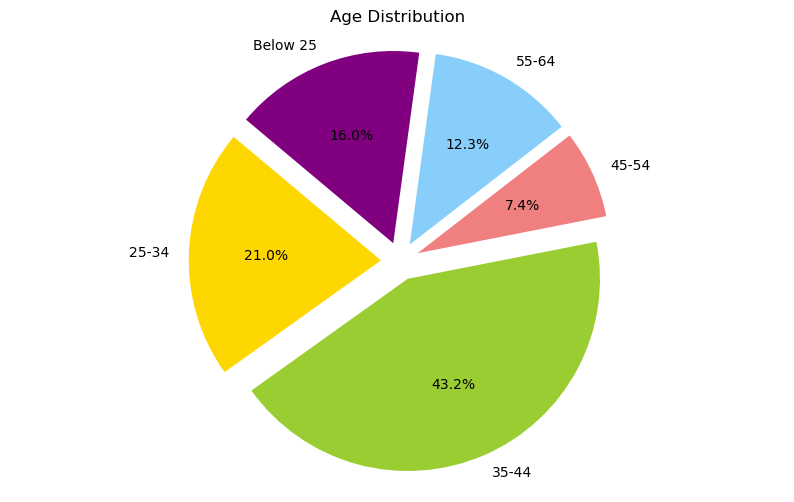

In [8]:
# Pie chart
labels = summary.index
sizes = summary['Frequency']
explode = [0.1] * len(labels)  
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple', 'orange', 'pink']  
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Age Distribution')
plt.show()

#### 2. GENDER

In [9]:
gender_freq = df.Gender.value_counts()
gender_freq

M    58
F    23
Name: Gender, dtype: int64

In [10]:
gender_proportions = df['Gender'].value_counts(normalize=True)
gender_proportions


M    0.716049
F    0.283951
Name: Gender, dtype: float64

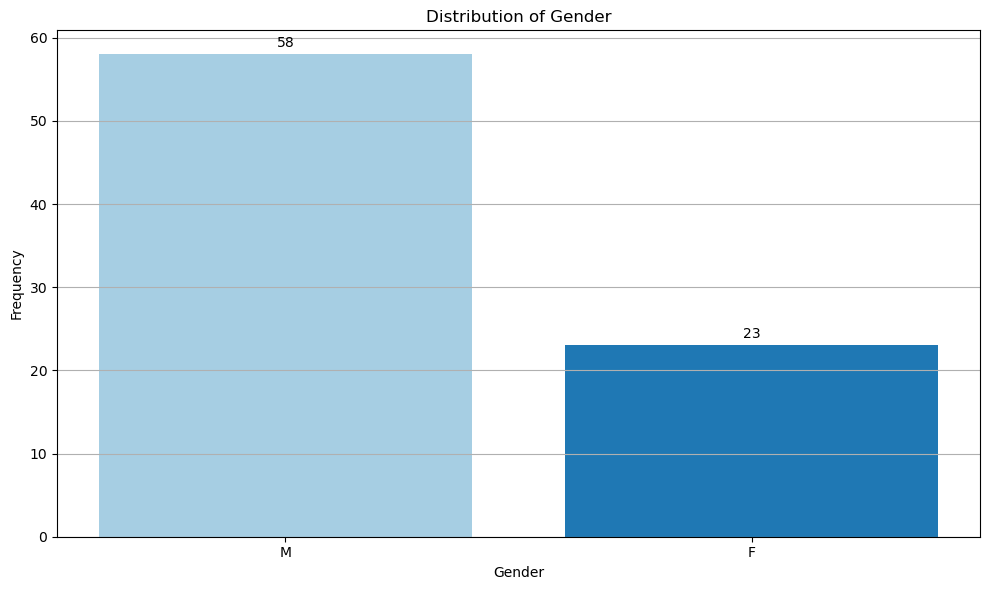

In [11]:
gender_freq_series = df.Gender.value_counts()
# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Using a colormap to get distinct colors
colors = plt.cm.Paired(range(len(gender_freq_series)))

bars = ax.bar(gender_freq_series.index, gender_freq_series.values, color=colors)

# Display frequency labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Setting grid, title, and labels
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Gender')
ax.set_xlabel('Gender')
ax.grid(axis='y')

plt.tight_layout()
plt.show()


#### 3. EDUCATION

In [12]:
#Education

edu_freq = pd.DataFrame(df.Education.value_counts())
edu_freq

,Education
Master's Degree,31
Doctorate or higher,28
Bachelor's Degree,22


In [13]:
#percentages
edu_proportions =df.Education.value_counts(normalize=True)
edu_proportions

Master's Degree        0.382716
Doctorate or higher    0.345679
Bachelor's Degree      0.271605
Name: Education, dtype: float64

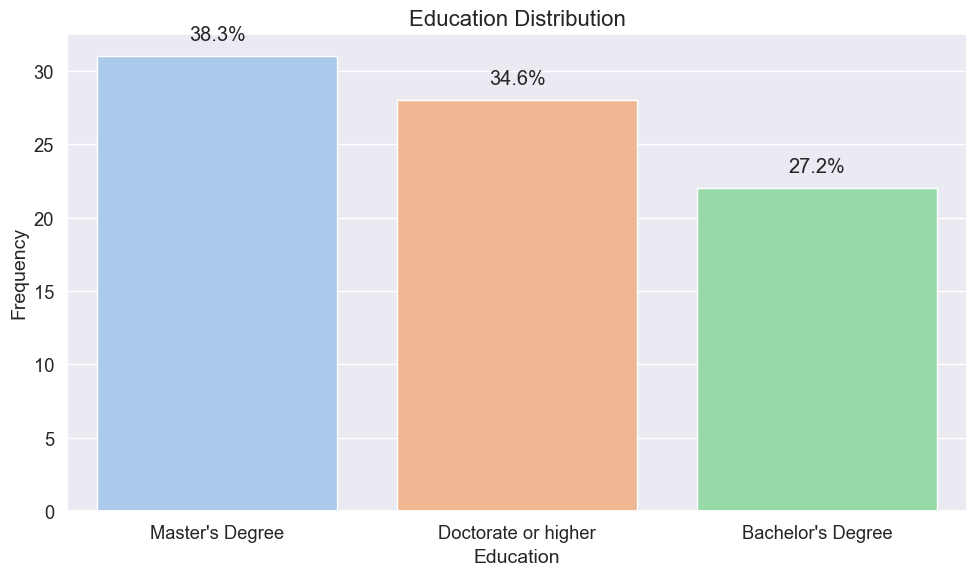

In [14]:
#VISUALIZATION
# Set a theme and font scale 
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Education', data=df, palette='pastel', order=df['Education'].value_counts().index)

# Title and labels
plt.title('Education Distribution', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add percentages on top of the bars
total = len(df.Education)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y + total*0.01), ha='center', va='bottom')  # added total*0.01 to slightly raise the label

# Display the plot
plt.tight_layout()
plt.show()

#### 4. EXPERIENCE

In [15]:
#Experience

experiencefreq = df.Experience.value_counts()
pd.DataFrame(experiencefreq)

,Experience
More than 10 Years,36
6-10 Years,26
1-5 Years,19


In [16]:
experience_proportions = df.Experience.value_counts(normalize=True)
for value in experience_proportions:
    print("{:.2%}".format(value))

44.44%
32.10%
23.46%


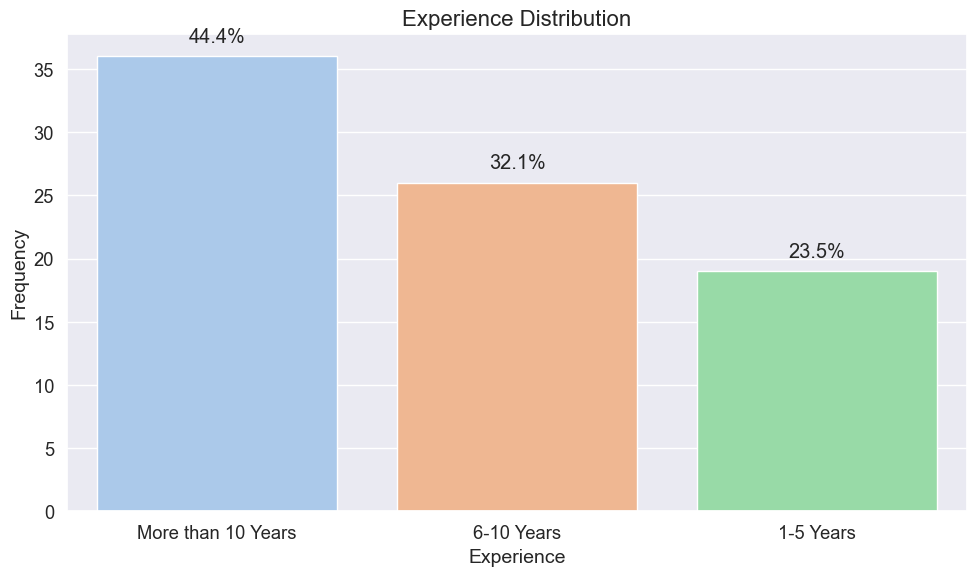

In [17]:
#visualisation

# Set a theme and font scale for scholarly plots
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Experience', data=df, palette='pastel', order=df['Experience'].value_counts().index)

# Title and labels
plt.title('Experience Distribution', fontsize=16)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add percentages on top of the bars
total = len(df.Experience)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y + total*0.01), ha='center', va='bottom')  # added total*0.01 to slightly raise the label

# Display the plot
plt.tight_layout()
plt.show()


## SECTION B: Current State and Challenges

### Using a scale of 1-5(1 being very poor, 5 being excellent), how would you rate the current state of construction project management in Uk

In [18]:
df.CurrentState.astype(int).describe()

count    81.000000
mean      3.456790
std       0.775393
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: CurrentState, dtype: float64

In [19]:
df.CurrentState.head()

0    3.0
1    4.0
2    3.0
3    5.0
4    2.0
Name: CurrentState, dtype: float64

In [20]:
# Convert 'CurrentState' column to integers
df['CurrentState'] = df['CurrentState'].astype(int)


rating_freq = df['CurrentState'].value_counts().sort_index()
rating_perc = df['CurrentState'].value_counts(normalize=True).sort_index()
summary = pd.DataFrame({'Frequency': rating_freq, 'Percentage': rating_perc})
summary['Percentage'] = summary['Percentage'].map("{:.2%}".format)
summary


,Frequency,Percentage
2,7,8.64%
3,37,45.68%
4,30,37.04%
5,7,8.64%


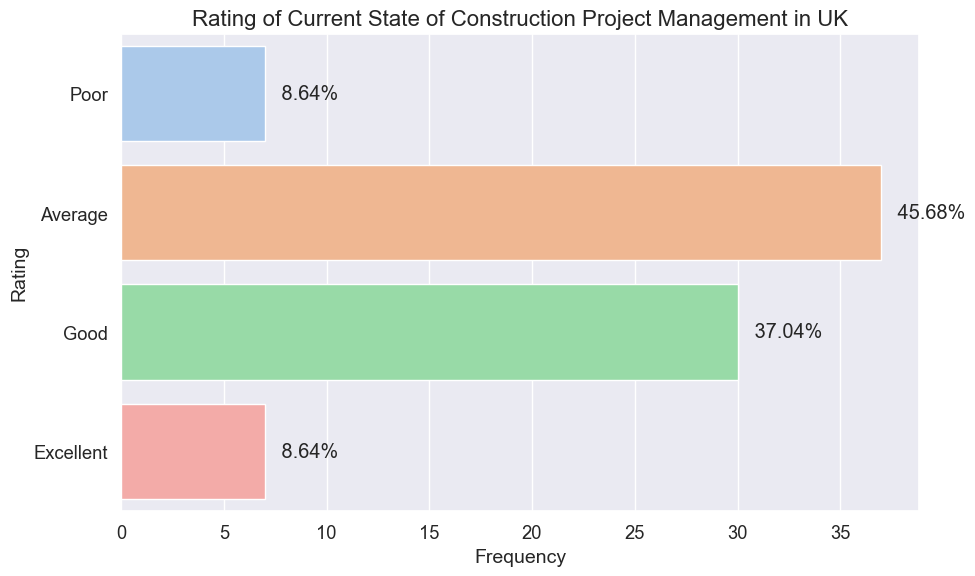

In [21]:
# Set a theme and font scale for scholarly plots
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.2)

# Convert 'CurrentState' column to integers if not already done
df['CurrentState'] = df['CurrentState'].astype(int)

# Get frequencies and percentages
rating_freq = df['CurrentState'].value_counts().sort_index()
rating_perc = df['CurrentState'].value_counts(normalize=True).sort_index()

# Define descriptive labels for the ratings
rating_labels = {
    1: 'Very Poor',
    2: 'Poor',
    3: 'Average',
    4: 'Good',
    5: 'Excellent'
}

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rating_freq.values, y=rating_freq.index.map(rating_labels.get), palette='pastel', orient='h')

# Title and labels
plt.title('Rating of Current State of Construction Project Management in UK', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Add percentages within the bars
for index, value in enumerate(rating_freq):
    percentage = '{:.2%}'.format(rating_perc.iloc[index])
    plt.text(value, index, '   ' + percentage, va="center")

# Display the plot
plt.tight_layout()
plt.show()

## Challenges in Construction Project Management

In [22]:

challenges_df = df[['Cost_Overun', 'Delays', 'Quality_Control', 'Communication', 'Implementing_Technology']]

likert_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}
# Compute mean and standard deviation for each variable
mean = challenges_df.mean()
std_dev = challenges_df.std()

# Compute the percentage of each response (from the Likert scale) for the variables
percentage_responses = challenges_df.apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Round the percentages to 2 decimal places and append percent sign
percentage_responses = percentage_responses.round(2).astype(str) + '%'

# Prepare the summary table
summary_challenges = pd.concat([mean, std_dev], axis=1)
summary_challenges.columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_challenges[f'{value}'] = percentage_responses[value]

summary_challenges

,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
Cost_Overun,3.666667,0.880341,1.23%,11.11%,19.75%,55.56%,12.35%
Delays,3.790123,0.876300,1.23%,6.17%,24.69%,48.15%,19.75%
Quality_Control,3.086420,0.911009,3.7%,18.52%,50.62%,19.75%,7.41%
Communication,3.148148,1.061969,6.17%,18.52%,41.98%,20.99%,12.35%
Implementing_Technology,2.851852,0.853099,8.64%,14.81%,62.96%,9.88%,3.7%


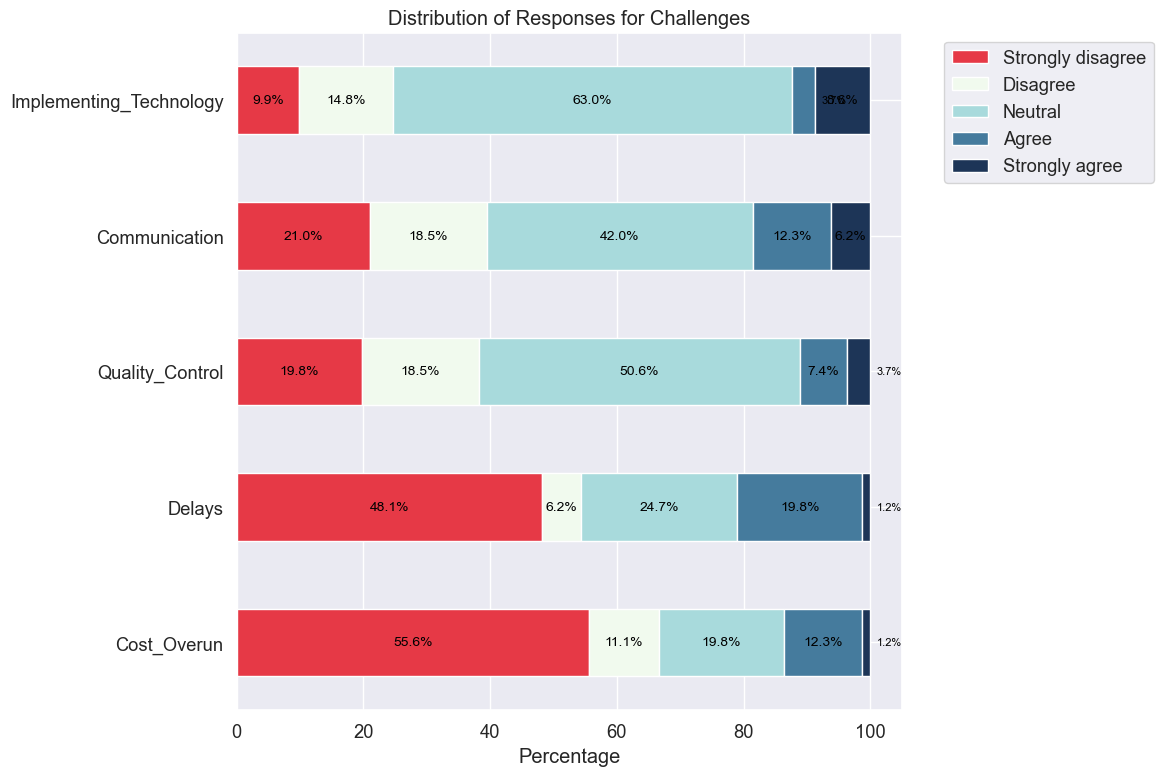

In [23]:
# Convert the counts into percentages
percentage_data = challenges_df.replace(likert_mapping).apply(lambda x: x.value_counts(normalize=True)).T.fillna(0) * 100

colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']  # color list
ax = percentage_data.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

for index, rect in enumerate(ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Labeling segments conditionally
    if width > 5:
        ax.text(x + width/2., y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=10)
    elif width > 0:
        ax.text(x + width + 3, y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=8)

# Rest of the plot aesthetics
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for Challenges')
ax.legend([likert_mapping[i] for i in range(1,6)], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Digital Twin Technology can effectively address the challenges faced in construction project management

In [24]:
ddtdata = df.DTTProjectManagement

In [25]:
ddtdata.describe()

count    81.000000
mean      3.876543
std       0.677914
min       2.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: DTTProjectManagement, dtype: float64

In [26]:
# 1. Calculate the mean and standard deviation
mean = ddtdata.mean()
std_dev = ddtdata.std()

# 2. Compute the percentage of each response from the Likert scale
percentage_responses = ddtdata.replace(likert_mapping).value_counts(normalize=True).reindex(likert_mapping.values()).fillna(0) * 100

# 3. Round the percentages to 2 decimal places
rounded_percentages = percentage_responses.round(2)

# 4. Prepare the summary table
summary_ddt = pd.DataFrame({
    'Mean': [mean],
    'Standard Deviation': [std_dev]
})

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_ddt[f'{value}'] = rounded_percentages[value]

summary_ddt

,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
0,3.876543,0.677914,0.0,2.47,22.22,60.49,14.81


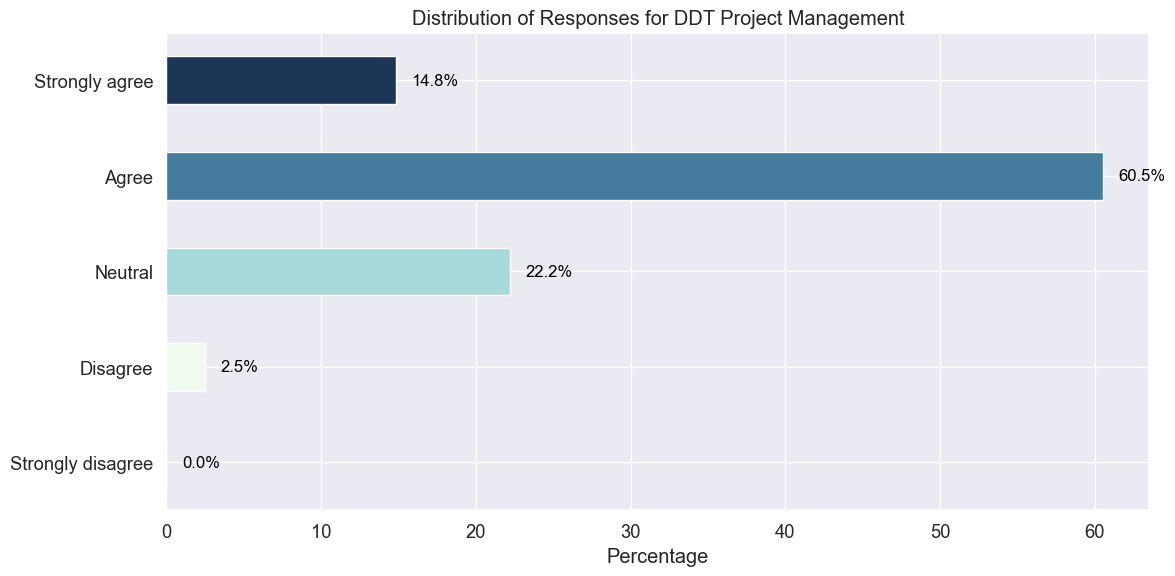

In [27]:

# Convert the counts into percentages
percentage_data = ddtdata.replace(likert_mapping).value_counts(normalize=True).reindex(likert_mapping.values()).fillna(0) * 100

colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']
ax = percentage_data.plot(kind='barh', color=colors, figsize=(12, 6))

for index, rect in enumerate(ax.patches):
    width = rect.get_width()
    y = rect.get_y()
    height = rect.get_height()
    
    # Labeling just after the end of bars
    ax.text(width + 1, y + height/2, f"{width:.1f}%", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for DDT Project Management')
ax.set_yticks(range(len(likert_mapping)))
ax.set_yticklabels([likert_mapping[i] for i in range(1,6)])

plt.tight_layout()
plt.show()


## The Feasibility of DDT

In [28]:
FeasibleDDT = df.DDT_Feasibility

In [29]:
FeasibleDDT.describe()

count    81.000000
mean      4.172840
std       0.519378
min       3.000000
25%       4.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: DDT_Feasibility, dtype: float64

In [30]:
# Calculate the mean and standard deviation
mean = FeasibleDDT.mean()
std_dev = FeasibleDDT.std()

# Compute the percentage of each response from the Likert scale
percentage_responses = FeasibleDDT.replace(likert_mapping).value_counts(normalize=True).reindex(likert_mapping.values()).fillna(0) * 100

# Round the percentages to 2 decimal places
rounded_percentages = percentage_responses.round(2)

# Prepare the summary table
summary_feasible = pd.DataFrame({
    'Mean': [mean],
    'Standard Deviation': [std_dev]
})

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_feasible[f'{value}'] = rounded_percentages[value]

summary_feasible


,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
0,4.17284,0.519378,0.0,0.0,6.17,70.37,23.46


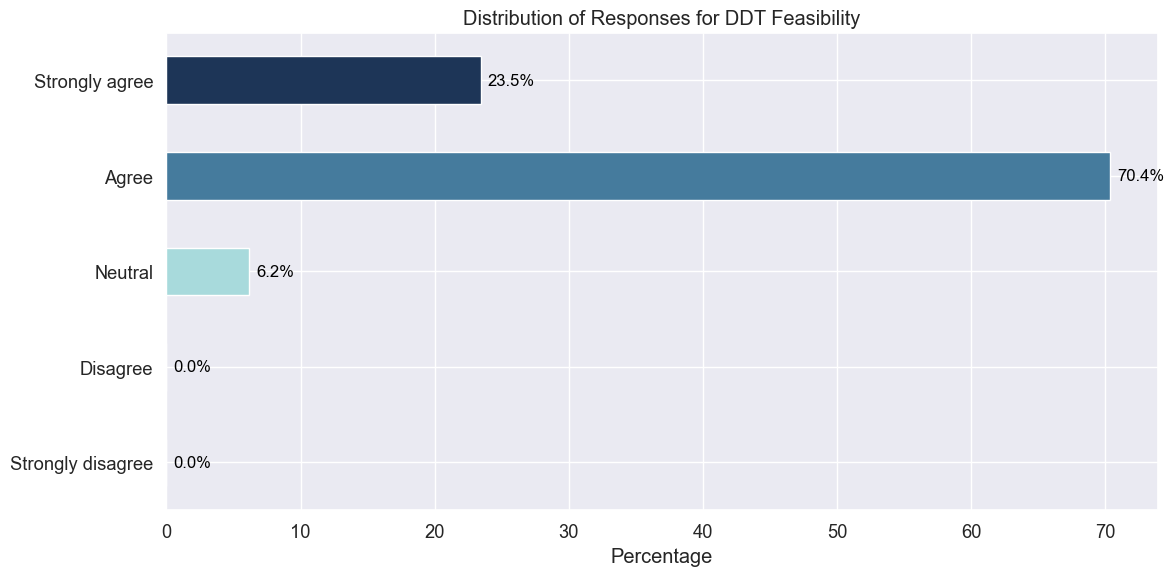

In [31]:
# Convert the counts into percentages
percentage_data = FeasibleDDT.replace(likert_mapping).value_counts(normalize=True).reindex(likert_mapping.values()).fillna(0) * 100

colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']
ax = percentage_data.plot(kind='barh', color=colors, figsize=(12, 6))

for index, rect in enumerate(ax.patches):
    width = rect.get_width()
    y = rect.get_y()
    height = rect.get_height()
    
    # Labeling just after the end of bars
    ax.text(width + 0.5, y + height/2, f"{width:.1f}%", ha='left', va='center', color='black', fontsize=12)

ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for DDT Feasibility')
ax.set_yticks(range(len(likert_mapping)))
ax.set_yticklabels([likert_mapping[i] for i in range(1,6)])

plt.tight_layout()
plt.show()


## Challenges/ Potential Barriers to Implementing DDT LIKERT

In [32]:

barriers_df = df[['Lack_of _Technical_Knowledge', 'High_Cost', 'Resistance', 'Standardised_Framework', 'Insufficient_Support']]
#Map the Integer Values to Corresponding Likert Scale:
likert_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Calculate the mean and standard deviation for each column
mean = barriers_df.mean()
std_dev = barriers_df.std()

# Compute the percentage of each response from the Likert scale for each column
percentage_responses = barriers_df.apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Round the percentages to 2 decimal places
rounded_percentages = percentage_responses.round(2)

# Prepare the summary table
summary_barriers = pd.concat([mean, std_dev], axis=1)
summary_barriers.columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_barriers[f'{value}'] = rounded_percentages[value]

summary_barriers
    


,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
Lack_of _Technical_Knowledge,3.419753,0.985700,6.17,11.11,23.46,53.09,6.17
High_Cost,3.716049,0.745563,1.23,4.94,23.46,61.73,8.64
Resistance,3.024691,0.805843,3.70,14.81,61.73,14.81,4.94
Standardised_Framework,3.135802,0.932109,7.41,9.88,49.38,28.40,4.94
Insufficient_Support,3.074074,0.971825,4.94,19.75,46.91,19.75,8.64


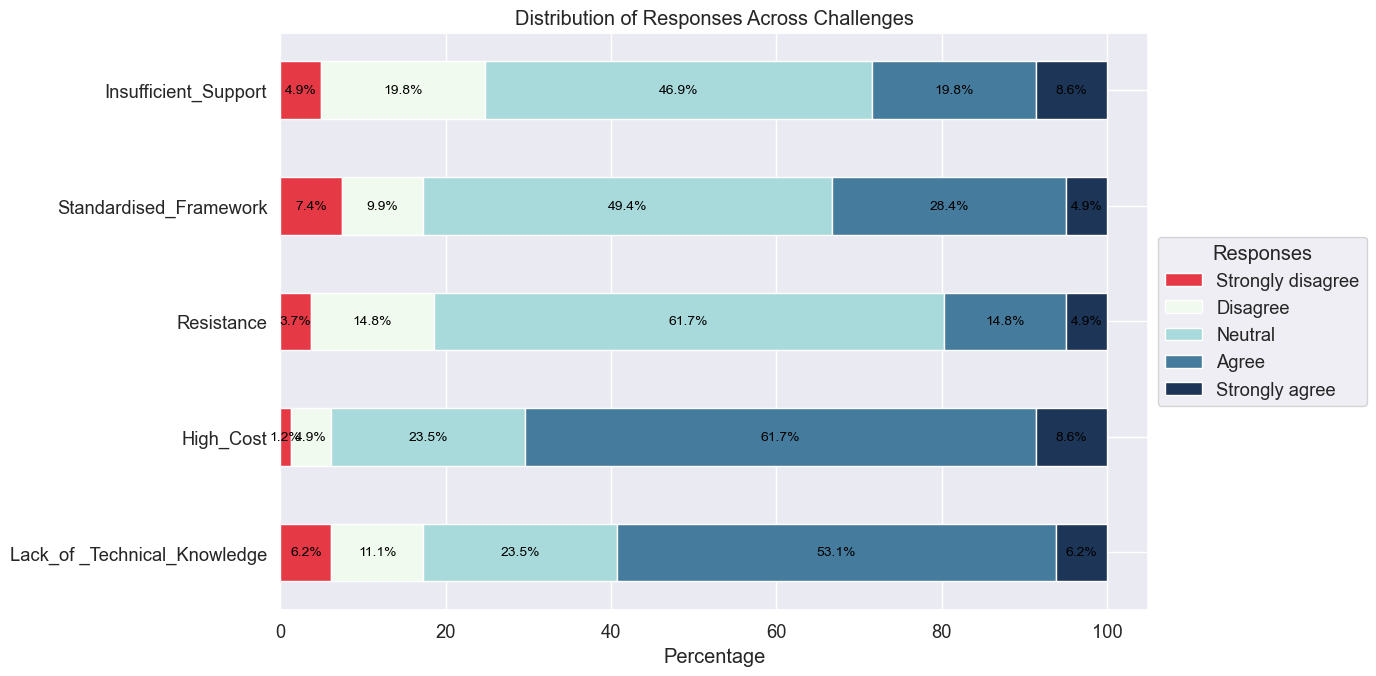

In [33]:
# Set up colors for visualization
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']

# Getting the normalized value counts (as percentages) for each challenge
percentages = barriers_df.apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100
sorted_columns = [likert_mapping[i] for i in range(1,6)] # Ensuring a consistent order of columns
percentages = percentages[sorted_columns]

# Plotting
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']
ax = percentages.plot(kind='barh', stacked=True, color=colors, figsize=(14, 7))

# Labeling
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
        ax.annotate(f"{width:.1f}%", (left + width/2, bottom + height/2), ha='center', va='center', color='black', fontsize=10)

ax.set_xlim(0, 105)  # Make some room for the annotations
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses Across Challenges')
ax.legend(title="Responses", loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### Rate of Digital Twin Technology Implementation

In [34]:
df.DTT_Implemented.value_counts()

Yes    73
No      8
Name: DTT_Implemented, dtype: int64

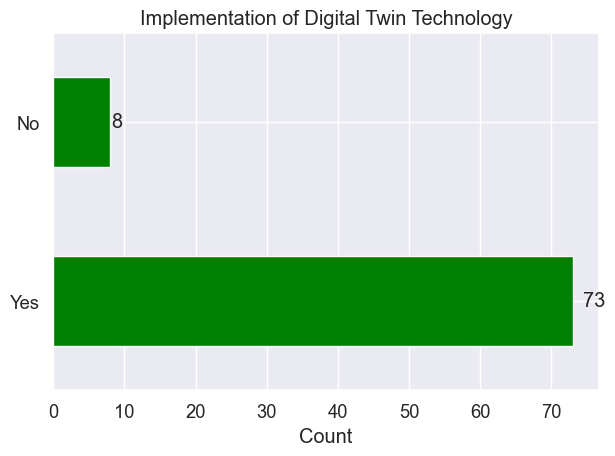

In [35]:
ax = df.DTT_Implemented.value_counts().plot(kind='barh', color='green', grid=True, title='Implementation of Digital Twin Technology', xlabel='Count')

# Adding frequency labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_width() * 1.02, p.get_y() + p.get_height()/2.), va='center')

plt.tight_layout()
plt.show()

    

### Impact of Digital Twin Technology Implementation

In [36]:
implementation_impact = df[['Project_Completion_Time', 'Cost_Efficiency', 'Error_Reduction']]

In [37]:
implementation_impact.describe()

,Project_Completion_Time,Cost_Efficiency,Error_Reduction
count,73.000000,73.000000,73.000000
mean,4.041096,3.863014,3.767123
std,0.789486,0.902390,0.935719
min,1.000000,1.000000,1.000000
25%,4.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000
75%,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000


In [38]:
# Define the Likert scale mappings
likert_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Compute mean and standard deviation for each variable
mean = implementation_impact.mean()
std_dev = implementation_impact.std()

# Compute the percentage of each response (from the Likert scale) for the variables
percentage_responses = implementation_impact.apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Round the percentages to 2 decimal places
percentage_responses = percentage_responses.round(2).astype(str) + '%'

# Prepare the summary table
summary_t = pd.concat([mean, std_dev], axis=1)
summary_t.columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_t[f'{value}'] = percentage_responses[value]

summary_t


,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
Project_Completion_Time,4.041096,0.789486,1.37%,2.74%,12.33%,57.53%,26.03%
Cost_Efficiency,3.863014,0.902390,2.74%,2.74%,23.29%,47.95%,23.29%
Error_Reduction,3.767123,0.935719,1.37%,4.11%,36.99%,31.51%,26.03%


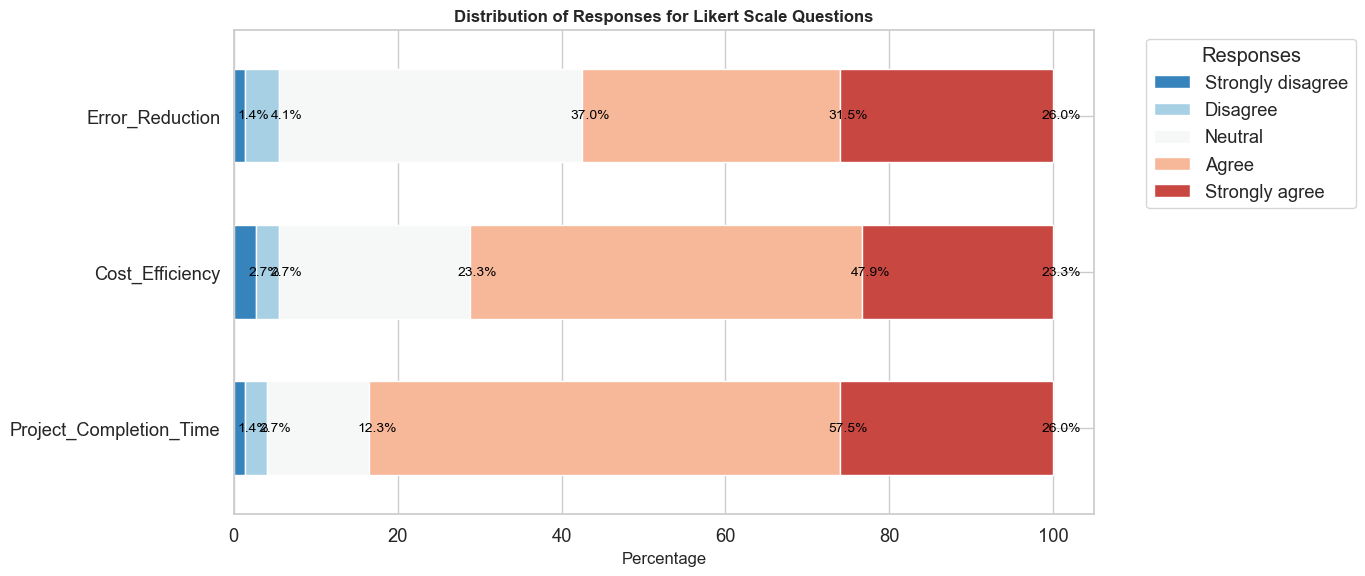

In [39]:
# Set the style of the visualization
sns.set_style("whitegrid")

# Create a count of responses for each question
count_data = implementation_impact.apply(lambda x: x.value_counts(normalize=True)).T.fillna(0)

# Convert the counts into percentages
percentage_data = count_data * 100

# A diverging color palette works well for Likert scale items
colors = sns.color_palette("RdBu", n_colors=5)[::-1]  # Reversed to match order

# Plot
ax = percentage_data.plot(kind='barh', stacked=True, color=colors, figsize=(14, 6), width=0.6)

for index, rect in enumerate(ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Label text for all non-zero width bars, adjusted for placement at the end of each bar
    if width > 0:
        ax.text(x + width + 1, y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=10)

# Improved aesthetics for the plot
ax.set_xlabel('Percentage', fontsize=12)
ax.set_title('Distribution of Responses for Likert Scale Questions', fontsize=12, fontweight='bold')
ax.legend([
    'Strongly disagree',
    'Disagree',
    'Neutral',
    'Agree',
    'Strongly agree'
], bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, title="Responses")

plt.tight_layout()
plt.show()

## Strategic Framework for DDT Integration-Factors

In [40]:
#
strategic_framework = df[['Clear_Objectives', 'Management_Support', 'Regular_Performance_Review', 'Budget_Allocation']]

ranking_mapping = {
    1: 'Most important',
    2: '2nd most important',
    3: '3rd most important',
    4: '4th most important',
    5: 'Least important'
}

# Compute mean and standard deviation for each variable
mean = strategic_framework.mean()
std_dev = strategic_framework.std()

# Compute the percentage of each response (from the ranking mapping) for the variables
percentage_responses = strategic_framework.apply(lambda x: x.replace(ranking_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Round the percentages to 2 decimal places and append percent sign
percentage_responses = percentage_responses.round(2).astype(str) + '%'

# Prepare the summary table
summary_SF = pd.concat([mean, std_dev], axis=1)
summary_SF .columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table
for key, value in ranking_mapping.items():
    summary_SF [f'{value}'] = percentage_responses[value]

summary_SF 


,Mean,Standard Deviation,Most important,2nd most important,3rd most important,4th most important,Least important
Clear_Objectives,3.641975,0.676547,1.23%,3.7%,28.4%,62.96%,3.7%
Management_Support,3.037037,0.843274,3.7%,18.52%,51.85%,22.22%,3.7%
Regular_Performance_Review,3.160494,0.697438,2.47%,7.41%,64.2%,23.46%,2.47%
Budget_Allocation,3.234568,0.884189,2.47%,14.81%,46.91%,28.4%,7.41%


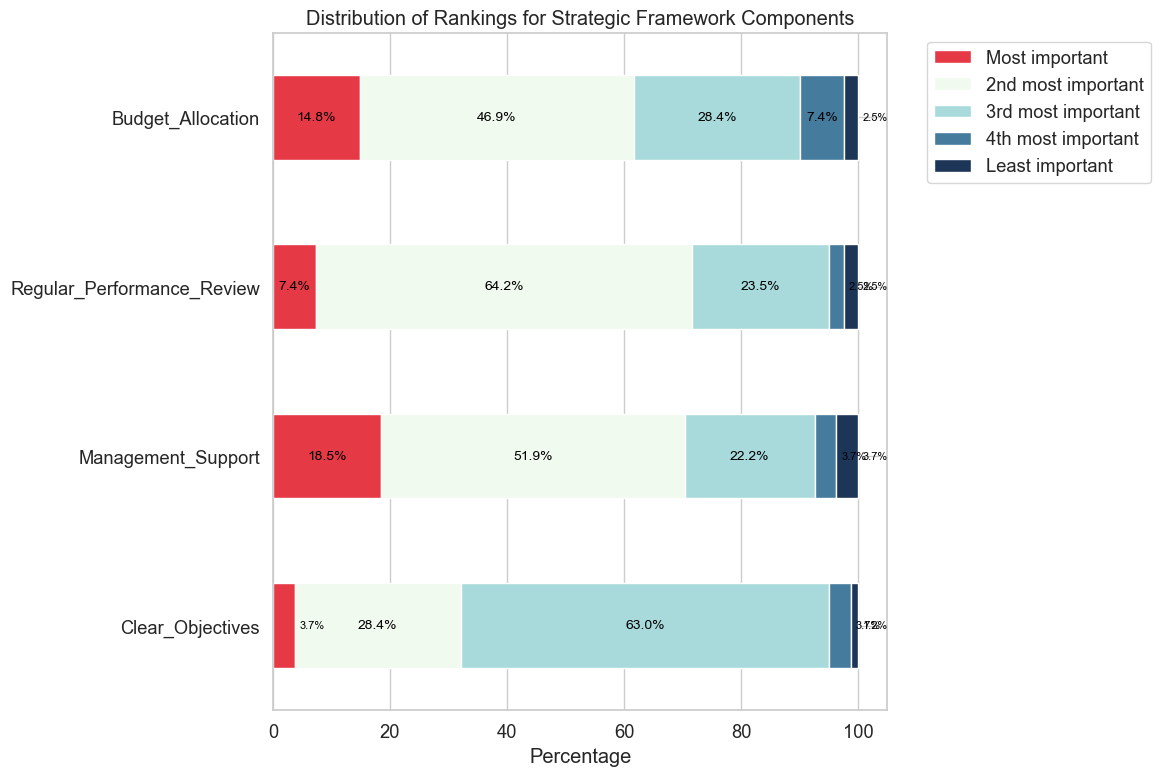

In [41]:


# Convert the counts into percentages
percentage_data = strategic_framework.replace(ranking_mapping).apply(lambda x: x.value_counts(normalize=True)).T.fillna(0) * 100

colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557'] # Adjust if needed
ax = percentage_data.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

for index, rect in enumerate(ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Labeling segments conditionally
    if width > 5:
        ax.text(x + width/2., y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=10)
    elif width > 0:
        ax.text(x + width + 3, y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=8)

# Rest of the plot aesthetics
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Rankings for Strategic Framework Components')
ax.legend([ranking_mapping[i] for i in range(1,6)], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### Ease of DDT Implementation in UK given the appropriate strategic Framework

In [42]:
ease_ddt = df['Ease_DDTImplementation']

In [43]:
ease_ddt.describe()

count    81.000000
mean      3.185185
std       0.823273
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Ease_DDTImplementation, dtype: float64

In [44]:
# Compute mean and standard deviation
mean = ease_ddt.mean()
std_dev = ease_ddt.std()

# Compute the percentage of each response (from the Likert scale) 
percentage_responses = ease_ddt.replace(likert_mapping).value_counts(normalize=True).fillna(0) * 100

# Round the percentages to 2 decimal places and append percent sign
percentage_responses = percentage_responses.round(2).astype(str) + '%'

# Prepare the summary table
summary_ease_ddt = pd.DataFrame({'Mean': [mean], 'Standard Deviation': [std_dev]})

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_ease_ddt[f'{value}'] = percentage_responses[value]

summary_ease_ddt

,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
0,3.185185,0.823273,1.23%,13.58%,59.26%,17.28%,8.64%


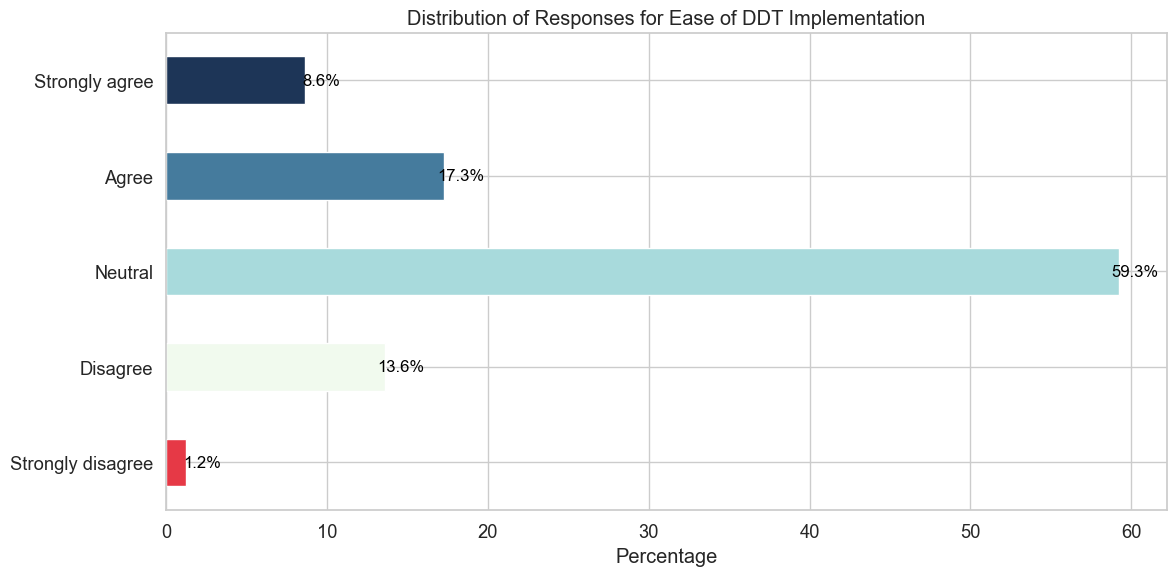

In [45]:

# Convert the counts into percentages
percentage_data = ease_ddt.replace(likert_mapping).value_counts(normalize=True).reindex(likert_mapping.values()).fillna(0) * 100

colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']
ax = percentage_data.plot(kind='barh', color=colors, figsize=(12, 6))

for index, rect in enumerate(ax.patches):
    width = rect.get_width()
    y = rect.get_y()
    height = rect.get_height()
    
    # Labeling at the end of bars
    ax.text(width + 1, y + height/2, f"{width:.1f}%", ha='center', va='center', color='black', fontsize=12)

# Rest of the plot aesthetics
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for Ease of DDT Implementation')
ax.set_yticks(range(len(likert_mapping)))
ax.set_yticklabels([likert_mapping[i] for i in range(1,6)])

plt.tight_layout()
plt.show()


# Inferential Statistics